In [2]:
import pandas as pd
import numpy as np 
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
%matplotlib inline

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


In [40]:
# read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

In [41]:
rr_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0


# Cleaning 2016 Road Race

In [42]:
rr_2016.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.0,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2821.000000
mean,-33.368017,151.225527,232.404465,25.280652,0.0,65.987952,158.394401,0.017381,-0.003756,34.933085,1.843318
std,0.028329,0.006014,29.725934,1.348746,0.0,34.425881,11.304588,0.015695,0.458872,10.738677,1.692364
min,-33.416753,151.211496,176.000000,24.000000,0.0,0.000000,102.000000,0.000000,-1.600000,0.000000,1.000000
25%,-33.393691,151.221912,209.450000,24.000000,0.0,68.000000,151.000000,0.007894,-0.400000,26.656312,1.000000
50%,-33.371820,151.227236,226.100000,25.000000,0.0,79.000000,158.000000,0.011794,0.000000,33.307339,1.000000
75%,-33.342269,151.230069,258.200000,26.000000,0.0,87.000000,166.000000,0.016899,0.400000,42.871885,2.000000
max,-33.316890,151.235131,295.800000,30.000000,0.0,117.000000,205.000000,0.076283,1.200000,92.749036,9.000000


# Comments on potential outliers
Most of the variables seem like they aren't affected by outliers, however: 'hr', 'distance', 'speed' & 'timedelta' all have either a max or min, multiple standard deviations away from the mean which suggests there are potentially some outliers that need to be addressed. So let's just plot the raw data for these variables.

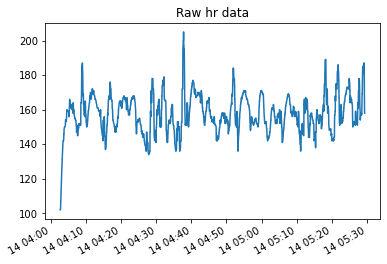

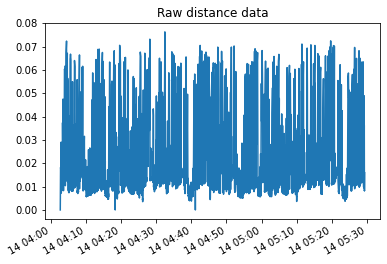

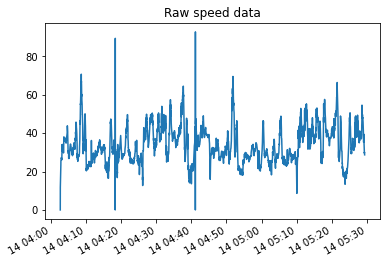

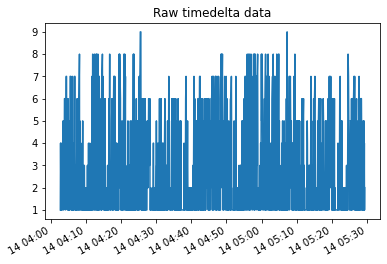

In [43]:
rr_2016['hr'].plot()
plt.title("Raw hr data")
plt.show()

rr_2016['distance'].plot()
plt.title("Raw distance data")
plt.show()

rr_2016['speed'].plot()
plt.title("Raw speed data")
plt.show()

rr_2016['timedelta'].plot()
plt.title("Raw timedelta data")
plt.show()

# Comments on raw data
- Hr definitely has an outlier, when it exceeds 200.
- Distance has outliers toward the min, I see 2 points where zero distance was travelled.
- Speed certainly has 2 outliers above 80km/h & 2 outliers that seem to be near zero.
- timedelta upon visual inspection doesn't seem to have outliers and so I won't address it.

## Approach to outliers
I feel it's best to keep the data points rather than remove them entirely, so using a rolling mean to smooth out these outliers such that the follow values are more or less what the should have been is the best approach. These outliers can be explained by blips in the equipment and are not valid data points.

In [62]:
outliers_RR2016 = rr_2016[(rr_2016['speed'] > 75) | (rr_2016['speed'] < 5.0) | (rr_2016['distance'] == 0) | (rr_2016['hr'] > 200)]

In [63]:
outliers_RR2016

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN
2016-05-14 04:18:20+00:00,-33.350502,151.229872,248.0,27.0,0.0,76.0,150.0,0.000000,0.0,0.000000,2.0
2016-05-14 04:18:21+00:00,-33.350280,151.229901,248.4,27.0,0.0,82.0,150.0,0.024832,0.4,89.394487,1.0
2016-05-14 04:37:46+00:00,-33.385791,151.224264,184.8,25.0,0.0,0.0,205.0,0.016413,-1.0,59.086634,1.0
2016-05-14 04:37:47+00:00,-33.385939,151.224291,183.8,25.0,0.0,0.0,205.0,0.016647,-1.0,59.928067,1.0
2016-05-14 04:37:48+00:00,-33.386082,151.224322,182.8,25.0,0.0,0.0,205.0,0.016159,-1.0,58.173366,1.0
2016-05-14 04:37:49+00:00,-33.386223,151.224351,181.8,25.0,0.0,0.0,204.0,0.015908,-1.0,57.268811,1.0
2016-05-14 04:41:09+00:00,-33.395848,151.215595,218.4,25.0,0.0,83.0,171.0,0.000000,-0.4,0.000000,1.0
2016-05-14 04:41:10+00:00,-33.396044,151.215447,217.8,25.0,0.0,109.0,171.0,0.025764,-0.6,92.749036,1.0


In [64]:
smooth_rr2016 = rr_2016.rolling(15, min_periods=1).mean()

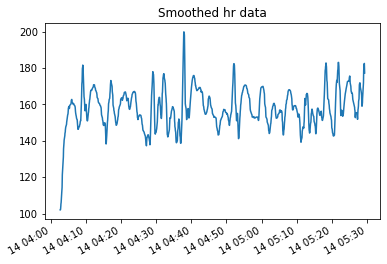

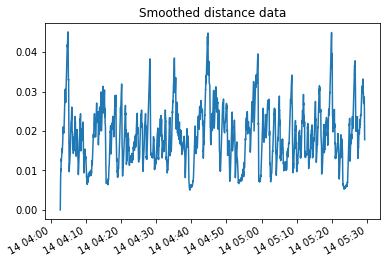

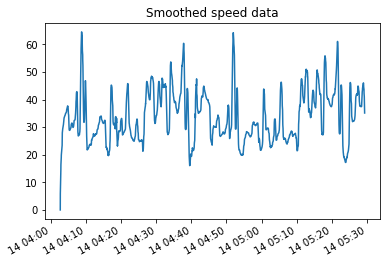

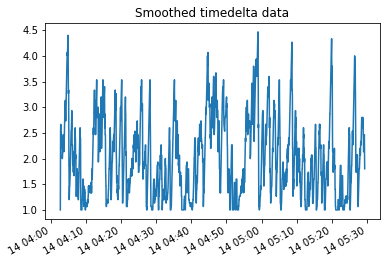

In [65]:
smooth_rr2016['hr'].plot()
plt.title("Smoothed hr data")
plt.show()

smooth_rr2016['distance'].plot()
plt.title("Smoothed distance data")
plt.show()

smooth_rr2016['speed'].plot()
plt.title("Smoothed speed data")
plt.show()

smooth_rr2016['timedelta'].plot()
plt.title("Smoothed timedelta data")
plt.show()

As can be seen, a rolling mean removes all max & min outliers from speed & distance whilst maintaining a similar shape to the original data. Hence we will this smoothed dataframe for the analysis of the 2016 Road Race. Yet there still is a problem with the heart rate that can't be resolved via a rolling mean. However, it is possible that people do have an arrhythmia (a short bout where the heart rate can go up to 250 bpm), given that there was a short sustained period of a heart rate above 200 I'm willing to not treat this as a   

# Resolving issues with hr > 200
We had a 4 second interval where the heart rate was above 200, on the surfa. A rolling mean doesn't remove this issue 

so for our summary we will set these 4 heart rate values to the mean heart rate, as to minimise the distortion to our analysis. 

# Summary for 2016 Road Race

In [89]:
rr_2016_dist = smooth_rr2016['distance'].sum()
rr_2016_avgSpeed = smooth_rr2016['speed'].mean()

#Time in seconds, makes sense to convert to minutes
rr_2016_totalTime = smooth_rr2016['timedelta'].sum()/60

rr_2016_maxSpeed = smooth_rr2016['speed'].max()
rr_2016_avgCadence = smooth_rr2016['cadence'].mean()
rr_2016_avgHr = smooth_rr2016['hr'].mean()

#total elevation climbed
rr_2016_total_elevation_climbed = smooth_rr2016[smooth_rr2016['elevation_gain'] > 0]
rr_2016_total_elevation_climbed = rr_2016_total_elevation_climbed['elevation_gain'].sum()
#Descent
rr_2016_total_elevation_descended = smooth_rr2016[smooth_rr2016['elevation_gain'] < 0]
rr_2016_total_elevation_descended = rr_2016_total_elevation_descended['elevation_gain'].sum()*(-1)



In [106]:
rr2016_summary_data = { 'Descriptions':['Total Kilometers Travelled', 'Total Time taken (Minutes)', 'Average Speed (km/h)', 'Max Speed (km/h)', 'Average Cadence (rpm)', 'Average Heart Rate (bpm)', 'Total Meter Climbed', 'Total Meters Descended'],
    '2016 Road Race Summary':[rr_2016_dist, rr_2016_totalTime, rr_2016_avgSpeed, rr_2016_maxSpeed, rr_2016_avgCadence, rr_2016_avgHr, rr_2016_total_elevation_climbed, rr_2016_total_elevation_descended]}

rr2016_summary = pd.DataFrame(rr2016_summary_data)

rr2016_summary.set_index('Descriptions')


,2016 Road Race Summary
Descriptions,
Total Kilometers Travelled,49.000146
Total Time taken (Minutes),86.731042
Average Speed (km/h),34.884264
Max Speed (km/h),64.517058
Average Cadence (rpm),66.107386
Average Heart Rate (bpm),158.226761
Total Meter Climbed,454.268571
Total Meters Descended,463.880000


# Cleaning 2016 Time Trial

In [98]:
tt_2016.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,1541.000000,1541.000000,1541.000000,1541.000000,1541.0,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1540.000000
mean,-33.368105,151.225411,139.068657,10.953277,0.0,83.277093,170.939650,0.016095,-0.002466,33.529963,1.783766
std,0.028055,0.006166,30.301132,0.657937,0.0,21.169978,23.392548,0.015897,0.515343,11.519681,1.822713
min,-33.418368,151.211206,85.000000,10.000000,0.0,0.000000,100.000000,0.000000,-7.400000,0.000000,1.000000
25%,-33.393795,151.221870,116.200000,11.000000,0.0,77.000000,157.000000,0.007622,-0.400000,25.068271,1.000000
50%,-33.370613,151.227333,134.000000,11.000000,0.0,86.000000,161.000000,0.010974,0.000000,32.840076,1.000000
75%,-33.343332,151.230072,165.400000,11.000000,0.0,96.000000,180.000000,0.015960,0.400000,41.470522,2.000000
max,-33.316888,151.235137,202.600000,13.000000,0.0,118.000000,251.000000,0.288175,2.400000,162.505764,31.000000


# Comments on potential outliers
Most of the variables seem like they aren't affected by outliers, however: 'hr', 'distance', 'speed' & 'timedelta' all have either a max or min, multiple standard deviations away from the mean which suggests there are potentially some outliers that need to be addressed. So let's just plot the raw data for these variables.

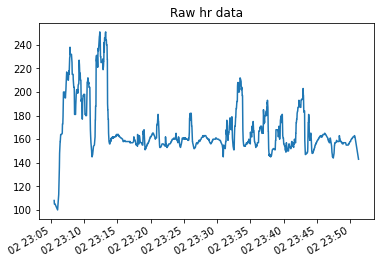

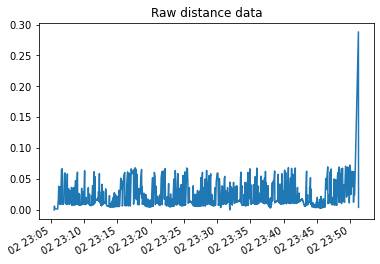

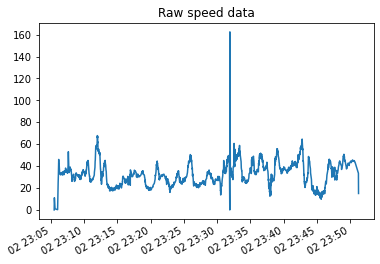

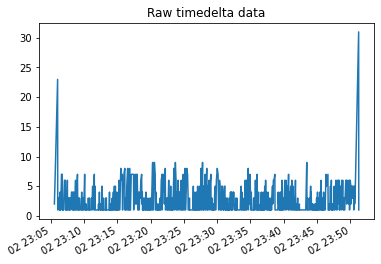

In [101]:
tt_2016['hr'].plot()
plt.title("Raw hr data")
plt.show()

tt_2016['distance'].plot()
plt.title("Raw distance data")
plt.show()

tt_2016['speed'].plot()
plt.title("Raw speed data")
plt.show()

tt_2016['timedelta'].plot()
plt.title("Raw timedelta data")
plt.show()

# Comments on raw data
- Hr definitely has outliers, data exceeding 200 is not humanly .
- Distance has outliers toward the min, I see 2 points where zero distance was travelled & also the obvious end point however this could coincide with the large time delta.
- Speed an outlier around 160 km/h & some 0 km/h outliers.


## Approach to outliers
I feel it's best to keep the data points rather than remove them entirely, so using a rolling mean to smooth out these outliers such that the follow values are more or less what the should have been is the best approach. These outliers can be explained by blips in the equipment and are not valid data points. Issue will be with heart rate data as it appears that there are many vales that 

In [104]:
outliers_tt2016 = tt_2016[ (tt_2016['hr'] > 200)]

In [105]:
outliers_tt2016 

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:07:16+00:00,-33.410593,151.218715,114.0,13.0,0.0,96.0,202.0,0.029851,0.0,35.821658,3.0
2016-07-02 23:07:17+00:00,-33.410531,151.218643,114.0,13.0,0.0,96.0,207.0,0.009602,0.0,34.565815,1.0
2016-07-02 23:07:18+00:00,-33.410468,151.218571,114.0,13.0,0.0,96.0,207.0,0.009682,0.0,34.854363,1.0
2016-07-02 23:07:20+00:00,-33.410339,151.218423,114.0,13.0,0.0,96.0,211.0,0.019861,0.0,35.750215,2.0
2016-07-02 23:07:21+00:00,-33.410277,151.218351,114.0,13.0,0.0,96.0,212.0,0.009602,0.0,34.565864,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-02 23:33:44+00:00,-33.335391,151.231023,164.2,10.0,0.0,81.0,204.0,0.009907,0.4,35.666076,1.0
2016-07-02 23:33:45+00:00,-33.335475,151.231017,164.6,10.0,0.0,92.0,204.0,0.009357,0.4,33.685167,1.0
2016-07-02 23:42:55+00:00,-33.386577,151.224426,85.8,11.0,0.0,107.0,201.0,0.014736,-0.4,53.049541,1.0
2016-07-02 23:42:56+00:00,-33.386699,151.224450,85.4,11.0,0.0,104.0,201.0,0.013748,-0.4,49.491249,1.0


In [42]:
print("Number of observations above 0.1km:", len(tt_2016[tt_2016['distance'] > 0.1]))

Number of observations above 0.1km: 1


In [57]:
clean_tt2016 = tt_2016[tt_2016['distance'] <= 0.1]

print("Overall distance travelled in 2016 time trial: ", "%.2f" % clean_tt2016['distance'].sum(),"km")

Overall distance travelled in 2016 time trial:  24.51 km


# Summary for Road Race 2019

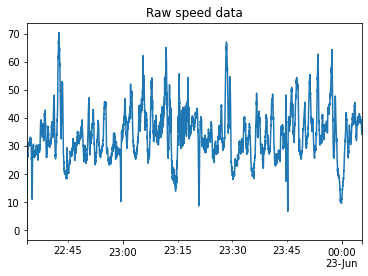

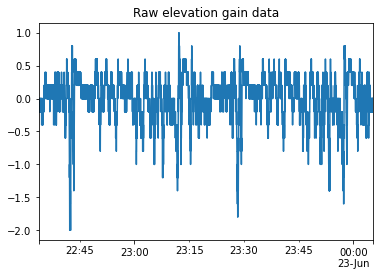

In [40]:
rr_2019['speed'].plot()
plt.title("Raw speed data")
plt.show()
rr_2019['elevation_gain'].plot()
plt.title("Raw elevation gain data")
plt.show()

Data for speed or elevation gain doesn't have any outliers.

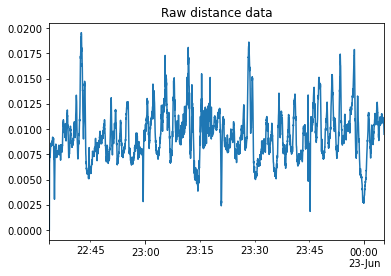

In [28]:
rr_2019['distance'].plot()
plt.title("Raw distance data")
plt.show()

In [55]:
print("Overall distance travlled:","%.2f" % rr_2019['distance'].sum(),"km")
print("Average speed:", "%.2f" % rr_2019['speed'].mean(),"km/hr")

Overall distance travlled: 51.79 km
Average speed: 33.88 km/hr


# Summary for Time Trial 2019

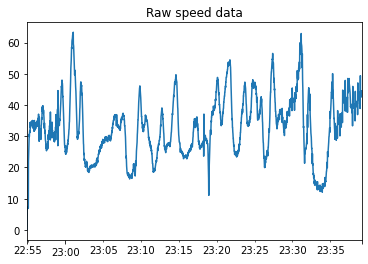

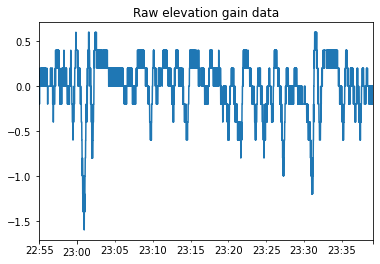

In [50]:
tt_2019['speed'].plot()
plt.title("Raw speed data")
plt.show()
tt_2019['elevation_gain'].plot()
plt.title("Raw elevation gain data")
plt.show()

There does not appear to be any outliers.

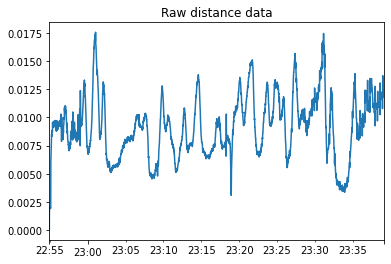

In [29]:
tt_2019['distance'].plot()
plt.title("Raw distance data")
plt.show()

In [56]:
print("Overall distance travlled:","%.2f" % tt_2019['distance'].sum(),"km")
print("Average speed:", "%.2f" % tt_2019['speed'].mean(),"km/hr")

Overall distance travlled: 24.38 km
Average speed: 33.06 km/hr


# Comparison of speeds: Time Trials vs. Road Race

## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.



